## Часть 1

Предварительно установим необходимые пакеты:

In [0]:
!pip install -U seaborn
!pip install -U pandasql

Подключим пользователя к Google Drive:

In [0]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/Files')
try:
  os.makedirs(local_download_path)
except: pass

In [0]:
# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "title='adult.dataset.csv'"}).GetList()

Подключим библиотеки для работы с датасетом:

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandasql as ps
%matplotlib inline 
sns.set(style="ticks")
import warnings
warnings.filterwarnings('ignore')

In [7]:
for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)

title: adult.dataset.csv, id: 1d9oaI8smgnh9JtdNmh30bc77CxoPyK-u
downloading to /root/Files/adult.dataset.csv


In [8]:
data = pd.read_csv(fname, sep=",")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Выполнение непосредственно задач 1 части:

1. How many men and women (sex feature) are represented in this dataset? 

(Как много мужчин и женщин представлено на датасете?)

In [9]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

2. What is the average age (age feature) of women?

(Какой средний возраст женщин?)

In [10]:
mean_age = data.loc[data['sex'] == 'Female', 'age'].mean()
print("Средний возраст: {0}".format(round(mean_age, 2)))

Средний возраст: 36.86


3. What is the percentage of German citizens (native-country feature)?

(Какой процент немецких граждан?)

In [11]:
percent = data.loc[data['native-country'] == 'Germany'].shape[0] * 100 / data.shape[0]
print("Процент немецких граждан: {0}%".format(round(percent, 4)))

Процент немецких граждан: 0.4207%


4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (salary feature) and those who earn less than 50K per year?

(Какое среднее значение и среднее отклонение в возрасте у тех, кто зарабатывает >50k и тех, кто зарабатывает <=50k?)

In [12]:
more_than_fifty = data.loc[data['salary'] == '>50K', 'age']
less_than_fifty = data.loc[data['salary'] == '<=50K', 'age']

print("Средний возраст >50K:  {0} +- {1}".format
      (round(more_than_fifty.mean()), round(more_than_fifty.std(), 2)))
print("Средний возраст <=50K: {0} +- {1}".format
      (round(less_than_fifty.mean()), round(less_than_fifty.std(), 2)))

Средний возраст >50K:  44 +- 10.52
Средний возраст <=50K: 37 +- 14.02


6. Is it true that people who earn more than 50K have at least high school education? (education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature)?

(Правда ли то, что люди, которые зарабатывают более 50k имеют как минимум школьное образование)

In [13]:
data.loc[data['salary'] == '>50K', 'education'].unique()

array(['HS-grad', 'Masters', 'Bachelors', 'Some-college', 'Assoc-voc',
       'Doctorate', 'Prof-school', 'Assoc-acdm', '7th-8th', '12th',
       '10th', '11th', '9th', '5th-6th', '1st-4th'], dtype=object)

Так как есть значения '7th-8th', это утверждение неверно

7. Display age statistics for each race (race feature) and each gender (sex feature). Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.

(Выведите статистику по возрасту для каждой расы и пола. Найдите максимальный возраст мужчины расы Amer-Indian-Eskimo)

In [14]:
for (race, sex), sub_data in data.groupby(['race', 'sex']):
    print("Race: {0}, sex: {1}".format(race, sex))
    print(sub_data['age'].describe())
    print()

Race: Amer-Indian-Eskimo, sex: Female
count    119.000000
mean      37.117647
std       13.114991
min       17.000000
25%       27.000000
50%       36.000000
75%       46.000000
max       80.000000
Name: age, dtype: float64

Race: Amer-Indian-Eskimo, sex: Male
count    192.000000
mean      37.208333
std       12.049563
min       17.000000
25%       28.000000
50%       35.000000
75%       45.000000
max       82.000000
Name: age, dtype: float64

Race: Asian-Pac-Islander, sex: Female
count    346.000000
mean      35.089595
std       12.300845
min       17.000000
25%       25.000000
50%       33.000000
75%       43.750000
max       75.000000
Name: age, dtype: float64

Race: Asian-Pac-Islander, sex: Male
count    693.000000
mean      39.073593
std       12.883944
min       18.000000
25%       29.000000
50%       37.000000
75%       46.000000
max       90.000000
Name: age, dtype: float64

Race: Black, sex: Female
count    1555.000000
mean       37.854019
std        12.637197
min        17.00

In [15]:
grouped_data = data.groupby(['race', 'sex'])
print("Максимальный возраст мужчин расы Amer-Indian-Eskimo: {0}"
      .format(grouped_data.get_group(('Amer-Indian-Eskimo','Male'))['age'].max(0)))

Максимальный возраст мужчин расы Amer-Indian-Eskimo: 82


8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (marital-status feature)? Consider as married those who have a marital-status starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.

(Какова доля женатых и неженатых мужчин с заработком >50k?)

In [16]:
married_salary_stat = data.loc[(data['sex'] == 'Male') & 
         (data['marital-status'].str.startswith('Married'))]
male_married = married_salary_stat.shape[0]
rich_married = married_salary_stat.loc[married_salary_stat['salary'] == '>50K'].shape[0]

bachelors_salary_stat = data.loc[(data['sex'] == 'Male') & 
         ~(data['marital-status'].str.startswith('Married'))]
male_bachelors = bachelors_salary_stat.shape[0]
rich_bachelors = bachelors_salary_stat.loc[bachelors_salary_stat['salary'] == '>50K'].shape[0]

print("Доля женатых мужчин с заработком >50К: {0}%".format(round(rich_married / male_married * 100, 2)))
print("Доля холостяков с заработком >50К: {0}%".format(round(rich_bachelors / male_bachelors * 100, 2)))

Доля женатых мужчин с заработком >50К: 44.05%
Доля холостяков с заработком >50К: 8.45%


9. What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?

(Какое максимальное число рабочих часов в неделю? Какое количество людей работает это число рабочих часов? Какова доля из этих людей, которые зарабатывают >50k?)

In [17]:
max_load = data['hours-per-week'].max()
num_people_max_load = data[data['hours-per-week'] == max_load].shape[0]
proportion = data.loc[(data['hours-per-week'] == max_load)
                 & (data['salary'] == '>50K')].shape[0] / num_people_max_load * 100

print("Максимальное количество рабочих часов в неделю: {0}".format(max_load))
print("Количество людей, работающих {0} часов в неделю: {1}".format(max_load, num_people_max_load))
print("Доля людей с большим заработком среди тех, кто работает {0} часов в неделю: {1}%"
     .format(max_load, round(proportion, 2)))

Максимальное количество рабочих часов в неделю: 99
Количество людей, работающих 99 часов в неделю: 85
Доля людей с большим заработком среди тех, кто работает 99 часов в неделю: 29.41%



10. Count the average time of work (hours-per-week) for those who earn a little and a lot (salary) for each country (native-country). What will these be for Japan?

(Подсчитайте среднее число часов в неделю для богатых (>50k) и бедных (<=50k) в каждой стране. Какое будет значение для Японии?)

In [18]:
pd.crosstab(data['native-country'], data['salary'], 
           values=data['hours-per-week'], aggfunc=np.mean).T

native-country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
salary,,,,,,,,,,,,,,,,,,,,,
<=50K,40.164760,41.416667,37.914634,37.381818,38.684211,37.985714,42.338235,38.041667,36.030928,40.483333,...,41.939394,38.470588,39.444444,40.15625,33.774194,42.866667,37.058824,38.799127,37.193548,41.6
>50K,45.547945,40.000000,45.641026,38.900000,50.000000,42.440000,47.000000,48.750000,45.000000,44.533333,...,41.500000,39.416667,46.666667,51.43750,46.800000,58.333333,40.000000,45.505369,39.200000,49.5


In [19]:
japanese = data.loc[data['native-country'] == 'Japan']
for (country, salary), sub_df in japanese.groupby(['native-country', 'salary']):
    print(country, salary, round(sub_df['hours-per-week'].mean(), 2))

Japan <=50K 41.0
Japan >50K 47.96


## Часть 2

In [0]:
# After first 3 cells in part 1
file_list = drive.ListFile(
    {'q': "title contains 'mlm_lab2_2_'"}
).GetList()

In [21]:
fnames = []
for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fnames.append(os.path.join(local_download_path, f['title']))
  print('downloading to {0}[{1}]'.format("fnames", len(fnames) - 1))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fnames[len(fnames) - 1])

title: mlm_lab2_2_user_usage.csv, id: 1_13razXeHU4QVE1pk9qRAW7RqkKb622H
downloading to fnames[0]
title: mlm_lab2_2_user_device.csv, id: 1lsiiarkA556JV_SCFb8YJKDnwmIDxk1x
downloading to fnames[1]
title: mlm_lab2_2_android_devices.csv, id: 1bcm-6KWZEAEmmYIFrsFd4w2ocO6KOXWa
downloading to fnames[2]


In [22]:
android_devices = pd.read_csv(fnames[2], sep=",")
android_devices.head()

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


In [23]:
user_usage = pd.read_csv(fnames[0], sep=",")
user_usage.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792


In [24]:
user_device = pd.read_csv(fnames[1], sep=",")
user_device.head()

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1


### Произвольный запрос на соединение двух наборов данных

* Pandas

In [0]:
def join_pandas(user_usage, user_device):
  joined = pd.merge(user_usage,
                    user_device[['use_id', 'platform', 'device']],
                    on='use_id')
  return joined

In [26]:
result = join_pandas(user_usage, user_device)
print("{0} записей".format(result.shape[0]))
result.head()

159 записей


,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


* PandaSQL

In [0]:
# PandaSQL can't find datasets without arguments
def join_pandasql(user_usage, user_device):  
  query = """SELECT
          use.*, dev.platform, dev.device
       FROM
          user_usage use
       JOIN
          user_device dev
             ON use.use_id = dev.use_id;"""

  return ps.sqldf(query, locals())

In [28]:
result = join_pandasql(user_usage, user_device)
print("{0} записей".format(result.shape[0]))
result.head()

159 записей


,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


In [0]:
import time

def count_mean_time(func, params, N = 5):
    total_time = 0
    for i in range(N):
        time1 = time.time()
        if len(params) == 1:
            tmp_df = func(params[0])
        elif len(params) == 2:
            tmp_df = func(params[0], params[1])
        time2 = time.time()
        total_time += (time2 - time1)
    return total_time/N

* Оценка времени выполнения

In [30]:
all_use_id = user_usage.use_id.unique().tolist()
len(all_use_id)

240

In [0]:
join_times = []
for use_id_count in range(5, 250, 5):
    use_ids = all_use_id[:use_id_count]
    user_usage_sample = user_usage[user_usage.use_id.isin(use_ids)]
    user_device_sample = user_device[user_device.use_id.isin(use_ids)]
    count = user_usage_sample.shape[0]
    pandasql_time = count_mean_time(join_pandasql, [user_usage_sample, user_device_sample])
    pandas_time = count_mean_time(join_pandas, [user_usage_sample, user_device_sample])
    join_times.append({'count': count, 'pandasql_time': pandasql_time, 'pandas_time': pandas_time})

In [0]:
join_times_df = pd.DataFrame(join_times).set_index('count')

Text(0, 0.5, 'time, seconds')

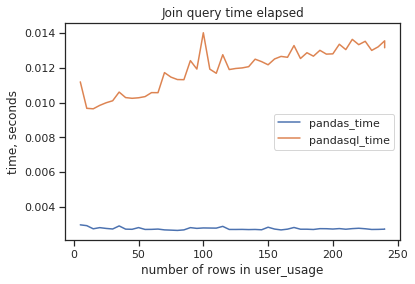

In [33]:
ax = join_times_df.plot(title = 'Join query time elapsed')
ax.set_xlabel('number of rows in user_usage')
ax.set_ylabel('time, seconds')

### Произвольный запрос на группировку набора данных с использованием функций агрегирования

* Pandas

In [0]:
def aggregation_pandas(result):
  return result.groupby('platform', as_index=False).agg({"outgoing_sms_per_month": "mean"})

In [35]:
agg_result = aggregation_pandas(result)
agg_result

,platform,outgoing_sms_per_month
0,android,85.354586
1,ios,293.975000


* PandaSQL

In [0]:
def aggregation_pandasql(result):
  query = """SELECT
            platform, 
            AVG(outgoing_sms_per_month) AS outgoing_sms_per_month
         FROM
            result
         GROUP BY platform;
         """

  return ps.sqldf(query, locals())

In [37]:
agg_result = aggregation_pandasql(result)
agg_result

,platform,outgoing_sms_per_month
0,android,85.354586
1,ios,293.975000


In [0]:
aggregation_times = []
for count in range(2, 160, 2):
    pandasql_time = count_mean_time(aggregation_pandasql, [result[:count]])
    pandas_time = count_mean_time(aggregation_pandas, [result[:count]])
    aggregation_times.append({'count': count, 'pandasql_time': pandasql_time, 'pandas_time': pandas_time})

In [0]:
aggregation_times_df = pd.DataFrame(aggregation_times)
aggregation_times_df.columns = ['number of rows in result', 'pandas time', 'pandasql time']
aggregation_times_df = aggregation_times_df.set_index('number of rows in result')

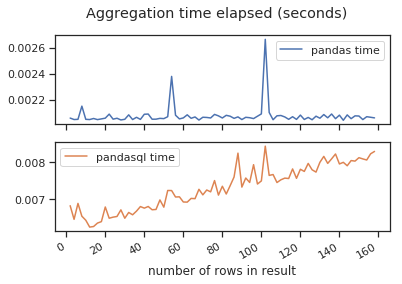

In [40]:
ax = aggregation_times_df.plot(title = 'Aggregation time elapsed (seconds)', subplots = True)